In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.display import Image as Image_Jupyter

# Les données : Cats vs Dogs (kaggle)

In [2]:
train = '../data/cats-dogs/train_resize/'
train_dogs = '../data/cats-dogs/train_resize/dogs/'
train_cats = '../data/cats-dogs/train_resize/cats/'

test = '../data/cats-dogs/test_resize/'

In [3]:
import PIL
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

/root/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


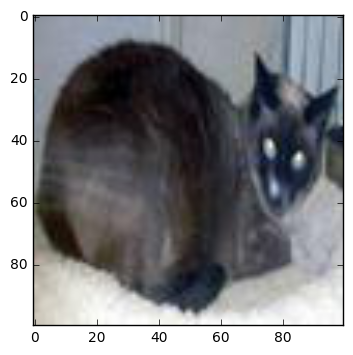

In [4]:
img = Image.open('../data/cats-dogs/train_resize/cats/10.jpg')
plt.imshow(img)

In [18]:
ROWS = 100
COLS = 100

# Modèle : AlexNet (2012)

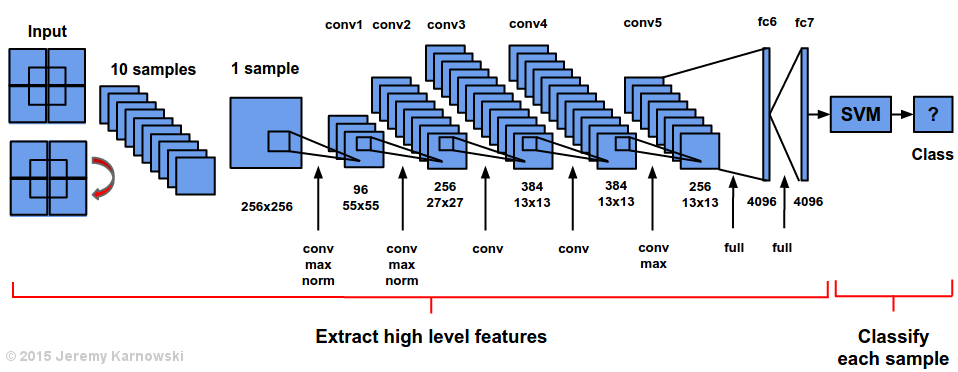

In [6]:
Image_Jupyter(filename='../ressources/alexnet.png') 

 - Dropout (régularisation)
 - Cropping (augmentation de données)
 - ReLU (fonction d'activation)
 
## Caisse à outils : 

In [30]:
# Point de départ
from keras.models import Sequential

# Couches nécessaires
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D

# Régularisation ? 
from keras.regularizers import l2

# Algorithme d'optimisation 
from keras.optimizers import SGD, RMSprop

In [21]:
model = Sequential()

model.add(Convolution2D(96, 11, 11,subsample=(2,2), border_mode='same', input_shape=(ROWS, COLS,3), activation='relu'))
# batch normalization ? 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),border_mode='valid'))
model.add(Convolution2D(384, 5, 5,subsample=(1,1), border_mode='same', activation='relu'))
# batch normalization ? 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),border_mode='valid'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(384, 3, 3, border_mode='same', activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(384, 3, 3, border_mode='same', activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2,2), border_mode='valid'))


model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_23 (Convolution2D) (None, 50, 50, 96)    34944       convolution2d_input_6[0][0]      
____________________________________________________________________________________________________
maxpooling2d_14 (MaxPooling2D)   (None, 25, 25, 96)    0           convolution2d_23[0][0]           
____________________________________________________________________________________________________
convolution2d_24 (Convolution2D) (None, 25, 25, 384)   921984      maxpooling2d_14[0][0]            
____________________________________________________________________________________________________
maxpooling2d_15 (MaxPooling2D)   (None, 12, 12, 384)   0           convolution2d_24[0][0]           
___________________________________________________________________________________________

In [31]:
sgd = SGD(lr=0.01)
rms = RMSprop(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=rms, metrics=['accuracy'])

# Gérer un gros dataset avec Keras 

In [23]:
from keras.preprocessing.image import ImageDataGenerator

- générateur de batch 
- augmentation de données en temps réel



```python
keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    dim_ordering=K.image_dim_ordering())

```

Permet aussi de manipuler des gros dataset :
- une classe par répertoire
- 

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        '../data/cats-dogs/train_resize/',
        target_size=(100, 100),
        batch_size=32,
        class_mode='binary')

Found 25000 images belonging to 2 classes.


In [ ]:
model.fit_generator(
        train_generator,
        samples_per_epoch=25000,
        nb_epoch=50,
        verbose=1)

Epoch 1/50
22888/25000 [==========================>...] - ETA: 66s - loss: 0.6603 - acc: 0.5932